# Start of program

In [25]:
from functions import *
#from get_field import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Input:

In [42]:
# Code should run for how many loops:
run_time = 100
# Between how many ped should be added per timestamp
ped_add_min = 1
ped_add_max = 8


In [43]:
ped_list = []
plotting_list = []

In [44]:
for t in range(0, run_time):
    ped_list = generate_ped(ped_list, ped_add_min, ped_add_max)
    if t == 0:
        print('!!')
        first = ped_list.copy()
    if t == int(run_time/2):
        half_way = ped_list.copy()
    print(ped_list)
    field_list = get_field(ped_list)
    for ped in range(0, len(ped_list)):
        probabilities = get_prob(ped_list, ped, field_list)
        decided_square = make_decision(probabilities)
        move_ped(ped_list, ped, decided_square)
    
        

!!
[[[15, 95], [9, 2]], [[0, 79], [6, 1]], [[18, 31], [12, 2]], [[6, 23], [8, 1]], [[9, 99], [7, 3]], [[14, 111], [5, 2]], [[20, 1], [11, 1]]]
[[[15, 95], [9, 1]], [[0, 79], [7, 2]], [[18, 31], [12, 3]], [[6, 23], [8, 0]], [[9, 99], [6, 2]], [[14, 111], [4, 2]], [[20, 1], [12, 0]], [[1, 16], [7, 3]], [[9, 21], [15, 3]], [[9, 50], [7, 3]]]
[[[15, 95], [9, 0]], [[0, 79], [8, 1]], [[18, 31], [12, 4]], [[6, 23], [7, 0]], [[9, 99], [6, 2]], [[14, 111], [4, 3]], [[20, 1], [12, 1]], [[1, 16], [7, 2]], [[9, 21], [16, 2]], [[9, 50], [6, 3]], [[20, 55], [10, 2]], [[16, 88], [15, 3]], [[7, 12], [7, 2]]]
[[[15, 95], [9, 1]], [[0, 79], [8, 0]], [[18, 31], [13, 3]], [[6, 23], [7, 0]], [[9, 99], [5, 1]], [[14, 111], [4, 4]], [[20, 1], [13, 2]], [[1, 16], [6, 1]], [[9, 21], [15, 2]], [[9, 50], [5, 2]], [[20, 55], [11, 2]], [[16, 88], [14, 2]], [[7, 12], [6, 2]], [[18, 10], [7, 3]], [[5, 29], [12, 1]], [[8, 45], [12, 2]], [[5, 9], [7, 1]], [[12, 17], [15, 3]], [[18, 76], [9, 1]], [[20, 33], [14, 3]], [

[[[15, 95], [12, 1]], [[0, 79], [6, 1]], [[18, 31], [15, 3]], [[6, 23], [11, 1]], [[9, 99], [8, 1]], [[14, 111], [0, 0]], [[20, 1], [13, 0]], [[1, 16], [9, 2]], [[9, 21], [16, 2]], [[9, 50], [3, 0]], [[20, 55], [9, 5]], [[16, 88], [8, 3]], [[7, 12], [8, 2]], [[18, 10], [4, 6]], [[5, 29], [13, 4]], [[8, 45], [16, 1]], [[5, 9], [2, 14]], [[12, 17], [15, 3]], [[18, 76], [7, 3]], [[20, 33], [16, 9]], [[4, 3], [6, 3]], [[2, 37], [10, 4]], [[20, 115], [12, 7]], [[19, 17], [6, 4]], [[11, 43], [15, 3]], [[14, 65], [9, 4]], [[14, 69], [11, 4]], [[8, 87], [15, 1]], [[3, 101], [13, 1]], [[20, 108], [14, 4]], [[6, 50], [9, 1]], [[4, 80], [14, 1]], [[13, 3], [11, 3]], [[12, 31], [4, 2]], [[6, 112], [9, 1]], [[17, 14], [7, 0]], [[2, 38], [14, 4]], [[12, 64], [7, 0]], [[15, 24], [1, 2]], [[17, 17], [8, 0]], [[17, 92], [10, 4]], [[6, 78], [5, 1]], [[10, 0], [13, 3]], [[0, 100], [13, 1]], [[18, 7], [3, 2]], [[2, 76], [6, 0]], [[4, 89], [5, 1]], [[1, 67], [13, 4]], [[4, 72], [11, 2]], [[19, 36], [5, 7]]

[[[15, 95], [17, 0]], [[0, 79], [9, 2]], [[18, 31], [13, 5]], [[6, 23], [8, 0]], [[9, 99], [1, 1]], [[14, 111], [2, 0]], [[20, 1], [13, 1]], [[1, 16], [7, 1]], [[9, 21], [15, 3]], [[9, 50], [1, 2]], [[20, 55], [11, 5]], [[16, 88], [9, 6]], [[7, 12], [4, 1]], [[18, 10], [2, 5]], [[5, 29], [4, 4]], [[8, 45], [9, 2]], [[5, 9], [1, 16]], [[12, 17], [16, 2]], [[18, 76], [5, 1]], [[20, 33], [12, 11]], [[4, 3], [7, 4]], [[2, 37], [8, 1]], [[20, 115], [13, 3]], [[19, 17], [8, 3]], [[11, 43], [21, 0]], [[14, 65], [6, 7]], [[14, 69], [10, 9]], [[8, 87], [17, 1]], [[3, 101], [15, 0]], [[20, 108], [8, 11]], [[6, 50], [11, 0]], [[4, 80], [11, 4]], [[13, 3], [8, 2]], [[12, 31], [1, 2]], [[6, 112], [8, 3]], [[17, 14], [5, 5]], [[2, 38], [12, 5]], [[12, 64], [7, 2]], [[15, 24], [3, 3]], [[17, 17], [10, 3]], [[17, 92], [13, 3]], [[6, 78], [7, 1]], [[10, 0], [20, 0]], [[0, 100], [7, 0]], [[18, 7], [4, 3]], [[2, 76], [6, 2]], [[4, 89], [11, 0]], [[1, 67], [13, 2]], [[4, 72], [11, 1]], [[19, 36], [13, 6]]

IndexError: index 21 is out of bounds for axis 0 with size 21

In [49]:
first

[[[15, 95], [17, 0]],
 [[0, 79], [9, 2]],
 [[18, 31], [13, 5]],
 [[6, 23], [8, 0]],
 [[9, 99], [1, 1]],
 [[14, 111], [2, 0]],
 [[20, 1], [13, 1]]]

In [50]:
half_way

[[[9, 57], [17, 3]],
 [[4, 17], [10, 5]],
 [[10, 45], [10, 4]],
 [[1, 44], [6, 0]],
 [[2, 37], [14, 7]],
 [[20, 23], [7, 1]],
 [[15, 97], [8, 0]],
 [[14, 1], [0, 5]],
 [[15, 43], [6, 0]],
 [[17, 43], [20, 8]],
 [[10, 52], [21, 1]],
 [[13, 18], [14, 1]],
 [[17, 68], [16, 1]],
 [[11, 55], [2, 4]],
 [[8, 94], [12, 1]],
 [[16, 67], [8, 4]],
 [[3, 59], [3, 7]],
 [[16, 10], [2, 3]],
 [[14, 80], [17, 0]],
 [[18, 21], [10, 1]],
 [[19, 118], [13, 0]],
 [[14, 9], [2, 2]],
 [[1, 52], [7, 4]],
 [[15, 98], [4, 5]],
 [[12, 103], [5, 9]],
 [[17, 85], [12, 2]],
 [[2, 52], [9, 0]],
 [[2, 72], [12, 9]],
 [[2, 87], [5, 4]],
 [[2, 2], [20, 0]],
 [[0, 83], [2, 0]],
 [[11, 16], [9, 6]],
 [[18, 84], [4, 3]],
 [[15, 15], [15, 2]],
 [[15, 20], [2, 0]],
 [[19, 9], [0, 1]],
 [[10, 90], [3, 3]],
 [[18, 77], [7, 8]],
 [[9, 51], [9, 7]],
 [[17, 7], [11, 3]],
 [[20, 14], [15, 1]],
 [[15, 13], [15, 0]],
 [[17, 15], [17, 2]]]

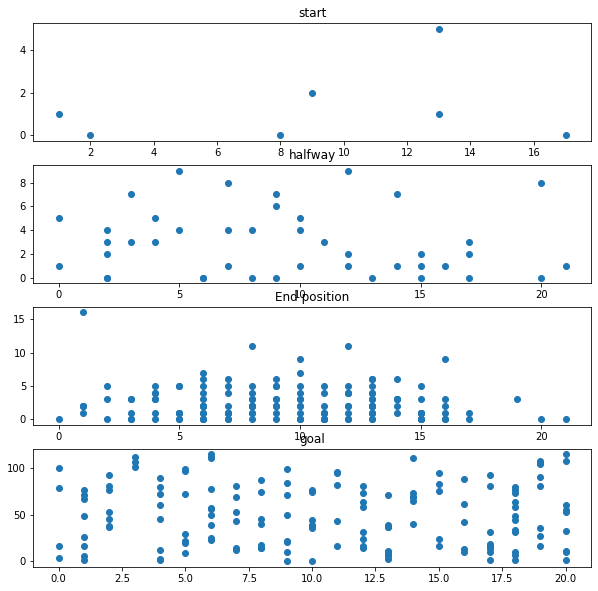

In [52]:
fig, ax = plt.subplots(4, figsize = (10,10))
array_first = np.array(first)
array_halfway = np.array(half_way)
array_end = np.array(ped_list)

ax[0].set_title('start')
ax[0].scatter(x=array_first[:,1,0], y=array_first[:,1,1])

ax[1].set_title('halfway')
ax[1].scatter(x=array_halfway[:,1,0], y=array_halfway[:,1,1])

ax[2].set_title('End position')
ax[2].scatter(x=array_end[:,1,0], y=array_end[:,1,1])

ax[3].set_title('goal')
ax[3].scatter(x=array_end[:,0,0], y=array_end[:,0,1])

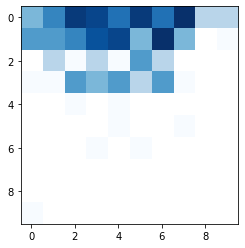

In [46]:
H, xedges, yedges = np.histogram2d(array[:,1,0], array[:,1,1], bins=(10))
H = H.T
fig, ax = plt.subplots()#figsize=(22, 3))
ax.imshow(H, cmap = 'Blues',norm = LogNorm())
#tight_layout()

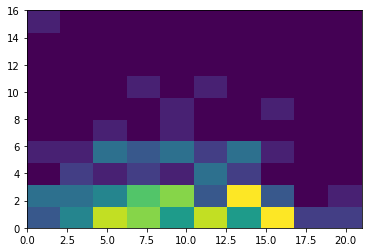

In [47]:
plt.hist2d(array[:,1,0], array[:,1,1], bins=10);